
Dataset Preview:
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X

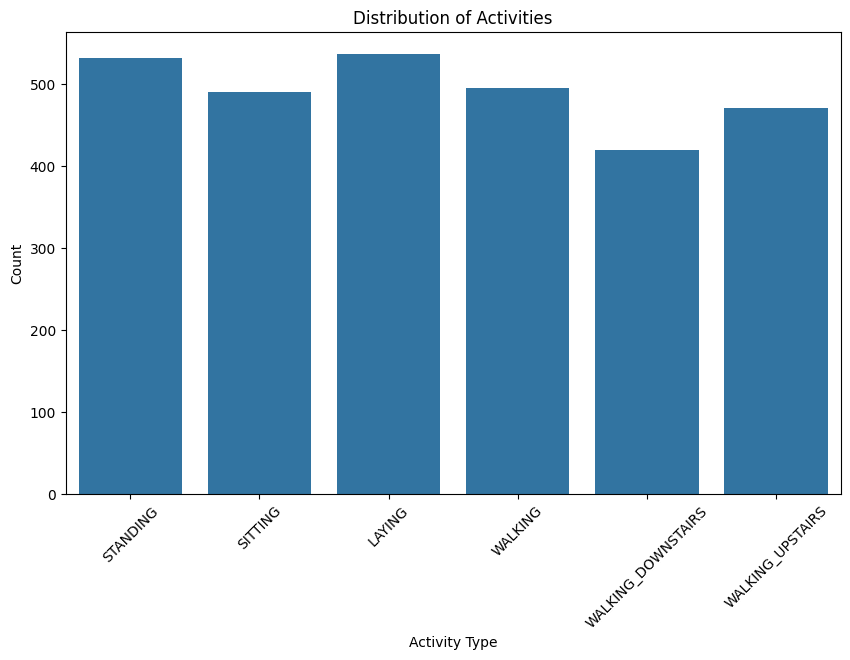


Class Distribution:
 Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64


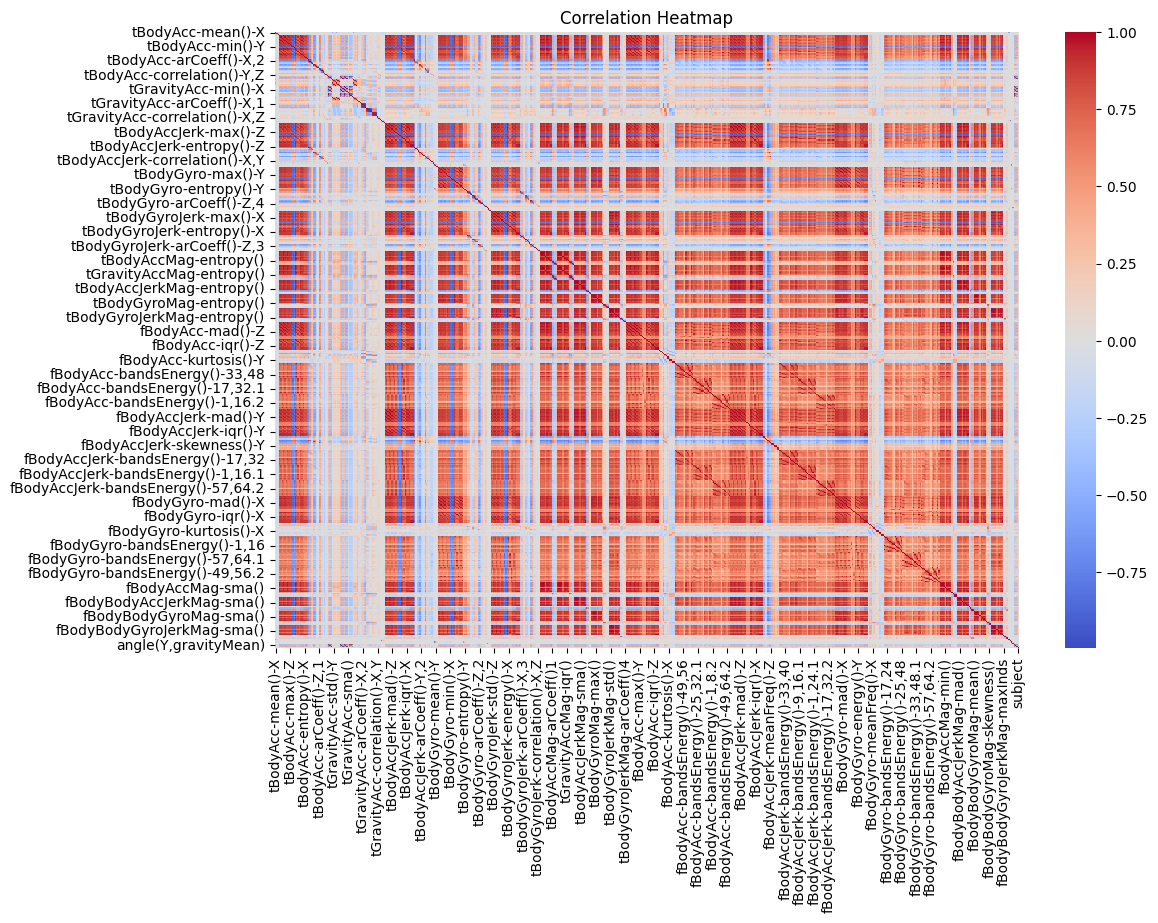


Number of duplicate rows: 0


In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dataset path
data_path = "/Users/ayesha/Desktop/Project/data/dataset.csv"
# In data_exploration.ipynb
test_data_path = "/Users/ayesha/Desktop/Project/data/test_dataset.csv"
test_data = pd.read_csv(test_data_path)
test_data_cleaned = preprocess_data(test_data)
test_data_cleaned.to_csv('/Users/ayesha/Desktop/Project/data/processed_test.csv', index=False)

# Load the dataset
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("\nDataset Preview:\n", data.head())

# Get basic information about the dataset
print("\nDataset Information:")
data.info()

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Summary statistics of numerical columns
print("\nSummary Statistics:\n", data.describe())

# Plot the distribution of the target variable (e.g., 'Activity')
if 'Activity' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Activity', data=data)
    plt.title("Distribution of Activities")
    plt.xlabel("Activity Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Check for class imbalance in the target variable
if 'Activity' in data.columns:
    print("\nClass Distribution:\n", data['Activity'].value_counts())

# Correlation heatmap for numerical features
# Exclude non-numeric columns for correlation computation
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Save preprocessed dataset (Optional, if changes are made)
# data.to_csv("/Users/ayesha/Desktop/Project/data/cleaned_dataset.csv", index=False)

# End of data exploration


In [34]:
# Print column names to debug features
print("\nDataset Columns:\n", data.columns)

# Print dataset shape
print("Dataset Shape (Rows, Columns):", data.shape)

# Identify the target column (assuming it's the last column)
target_column = data.columns[-1]
print("\nTarget Column:", target_column)

# Number of features excluding the target column
num_features = data.shape[1] - 1
print("\nNumber of Features (excluding target column):", num_features)



Dataset Columns:
 Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)
Dataset Shape (Rows, Columns): (2947, 563)

Target Column: Activity

Number of Features (excluding target column): 562


for Evualation 

In [35]:
def preprocess_test_data(test_data):
    # Apply same preprocessing as training data
    test_data = test_data.fillna(0)
    
    # Remove outliers using IQR
    Q1 = test_data.quantile(0.25)
    Q3 = test_data.quantile(0.75)
    IQR = Q3 - Q1
    test_data = test_data[~((test_data < (Q1 - 1.5 * IQR)) | (test_data > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return test_data

adding feature Selection

In [36]:
def select_features(X_test, importance_threshold=0.01):
    feature_importances = pd.DataFrame({
        'feature': training_columns,
        'importance': rf.feature_importances_
    })
    selected_features = feature_importances[feature_importances['importance'] > importance_threshold]['feature']
    return X_test[selected_features]

modify evaluate model 


Test Dataset Preview:
           0         1         2         3         4         5         6  \
0 -1.214144 -0.326919  0.507910  0.525480  1.096306  0.102287  0.578532   
1  0.027804 -0.099040 -0.369716 -0.928516 -0.969507 -0.973114 -0.923256   
2  0.010460  0.808721 -0.220697  0.800126  1.258569  1.316113  0.765806   
3 -0.098854 -0.106619  0.137436 -0.900172 -0.921952 -0.951879 -0.899004   
4 -0.115476  0.046800  0.033655 -0.835005 -0.965825 -0.947577 -0.829378   

          7         8         9  ...       553       554       555       556  \
0  1.131777  0.169877  0.661787  ... -0.304102  1.852796 -0.143371  1.291023   
1 -0.968575 -0.978813 -0.914239  ... -0.927401 -0.214711  0.063861 -0.841529   
2  1.333330  1.538553  0.778919  ... -0.768626  0.455829  1.017628 -1.342905   
3 -0.914493 -0.946879 -0.882192  ...  2.026737 -0.272970  0.426690  1.155904   
4 -0.963835 -0.940774 -0.848108  ... -0.511938 -0.214678 -0.323502 -0.712689   

        557       558       559       560   

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Summary Statistics for Test Dataset:
                 0           1           2           3           4           5  \
count  590.000000  590.000000  590.000000  590.000000  590.000000  590.000000   
mean     0.028274   -0.003678   -0.002229    0.023352    0.053878   -0.007519   
std      0.889208    0.888666    0.839323    1.001777    1.034347    0.971285   
min     -5.311400   -4.181332   -4.822574   -0.933192   -0.988116   -0.999246   
25%     -0.193280   -0.275476   -0.293887   -0.916233   -0.948543   -0.943278   
50%      0.056913    0.036023   -0.013716   -0.676164   -0.329032   -0.395664   
75%      0.254302    0.282830    0.281848    0.873235    0.881309    0.901734   
max      3.267859    6.610645    5.760074    2.550316    3.011900    2.472617   

                6           7           8           9  ...         553  \
count  590.000000  590.000000  590.000000  590.000000  ...  590.000000   
mean     0.025544    0.055050   -0.009304    0.026019  ...    0.007900   
std      

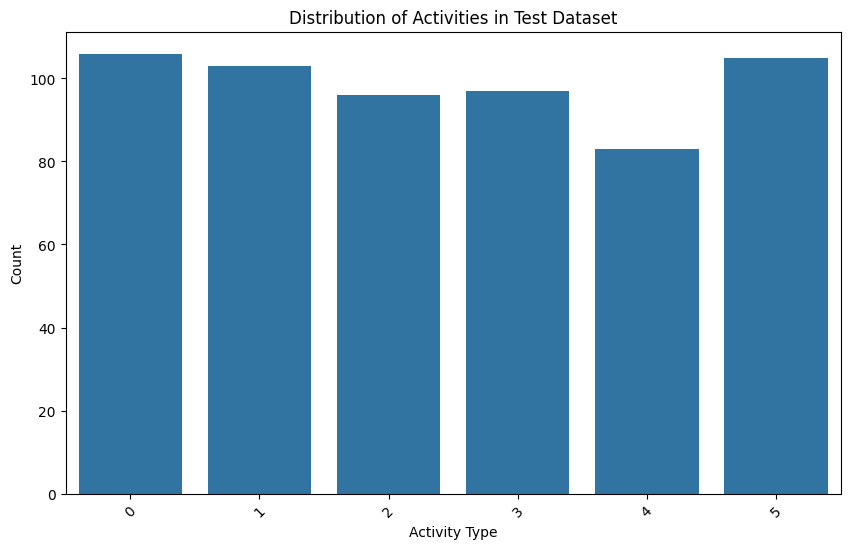


Class Distribution in Test Dataset:
 Activity
0    106
5    105
1    103
3     97
2     96
4     83
Name: count, dtype: int64


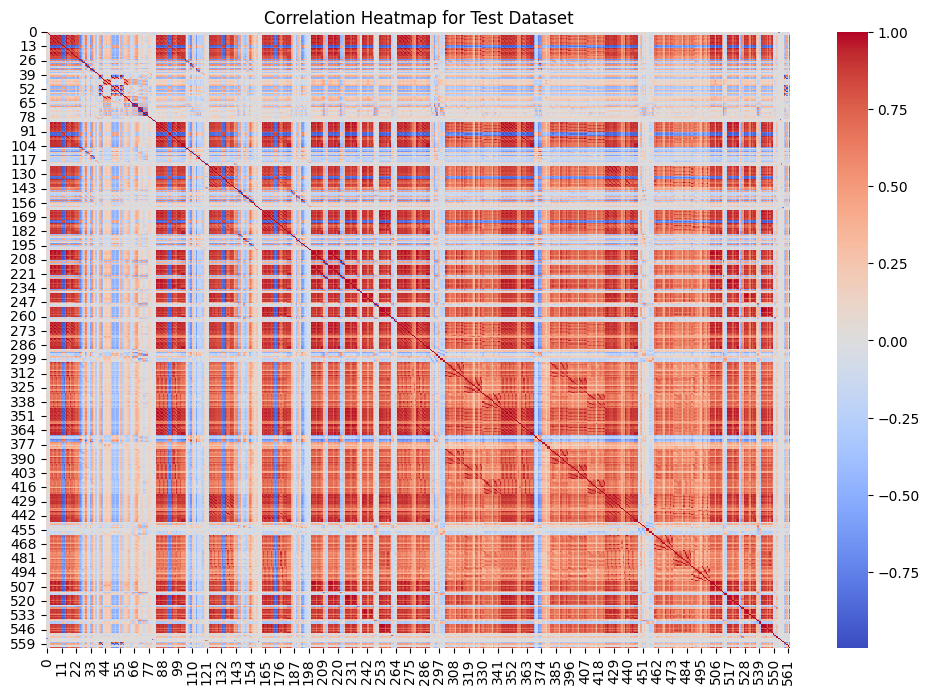


Number of duplicate rows in Test Dataset: 0


In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the test dataset path
test_data_path = "/Users/ayesha/Desktop/Project/data/test_dataset.csv"

# Load the test dataset
test_data = pd.read_csv(test_data_path)

# Display the first few rows of the test dataset
print("\nTest Dataset Preview:\n", test_data.head())

# Get basic information about the test dataset
print("\nTest Dataset Information:")
test_data.info()

# Check for missing values in the test dataset
print("\nMissing Values in Test Dataset:\n", test_data.isnull().sum())

# Summary statistics of numerical columns in the test dataset
print("\nSummary Statistics for Test Dataset:\n", test_data.describe())

# Print column names to debug features in the test dataset
print("\nTest Dataset Columns:\n", test_data.columns)

# Print dataset shape for the test dataset
print("Test Dataset Shape (Rows, Columns):", test_data.shape)

# Identify the target column in the test dataset (assuming it's the last column)
test_target_column = test_data.columns[-1]
print("\nTarget Column in Test Dataset:", test_target_column)

# Number of features excluding the target column in the test dataset
num_test_features = test_data.shape[1] - 1
print("\nNumber of Features (excluding target column) in Test Dataset:", num_test_features)

# Plot the distribution of the target variable in the test dataset
if 'Activity' in test_data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Activity', data=test_data)
    plt.title("Distribution of Activities in Test Dataset")
    plt.xlabel("Activity Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Check for class imbalance in the target variable for the test dataset
if 'Activity' in test_data.columns:
    print("\nClass Distribution in Test Dataset:\n", test_data['Activity'].value_counts())

# Correlation heatmap for numerical features in the test dataset
# Exclude non-numeric columns for correlation computation
numeric_test_data = test_data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_test_data.corr(), cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap for Test Dataset")
plt.show()

# Check for duplicate rows in the test dataset
test_duplicates = test_data.duplicated().sum()
print(f"\nNumber of duplicate rows in Test Dataset: {test_duplicates}")

# Save preprocessed test dataset (Optional, if changes are made)
# test_data.to_csv("/Users/ayesha/Desktop/Project/data/cleaned_test_dataset.csv", index=False)

# End of test dataset exploration


In [38]:
import pandas as pd
import joblib

# Define paths
test_data_path = "/Users/ayesha/Desktop/Project/data/test_dataset.csv"
aligned_test_data_path = "/Users/ayesha/Desktop/Project/data/aligned_test_dataset.csv"
training_columns_path = "/Users/ayesha/Desktop/Project/models/training_columns.pkl"

# Load the test dataset
test_data = pd.read_csv(test_data_path)

# Load training columns
training_columns = joblib.load(training_columns_path)

# Align test data columns with training columns
X_test = test_data.drop(columns=["Activity"], errors="ignore")  # Drop target column
X_test_aligned = X_test.reindex(columns=training_columns, fill_value=0)  # Reindex to match training columns

# Re-attach the target column if available
if "Activity" in test_data.columns:
    X_test_aligned["Activity"] = test_data["Activity"]

# Save aligned test dataset
X_test_aligned.to_csv(aligned_test_data_path, index=False)
print(f"Aligned test dataset saved to: {aligned_test_data_path}")


Aligned test dataset saved to: /Users/ayesha/Desktop/Project/data/aligned_test_dataset.csv


In [40]:
import joblib

# Load training columns
training_columns_path = "/Users/ayesha/Desktop/Project/models/training_columns.pkl"
training_columns = joblib.load(training_columns_path)

print("Training Columns:", training_columns)
print(f"Number of Training Columns: {len(training_columns)}")


Training Columns: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravity

In [42]:
import pandas as pd
import joblib

# Define paths
test_data_path = "/Users/ayesha/Desktop/Project/data/test_dataset.csv"
aligned_test_data_path = "/Users/ayesha/Desktop/Project/data/aligned_test_dataset_fixed.csv"
training_columns_path = "/Users/ayesha/Desktop/Project/models/training_columns.pkl"

# Load the test dataset
test_data = pd.read_csv(test_data_path)

# Load training columns
training_columns = joblib.load(training_columns_path)

# Align test data columns with training columns (exclude "Activity" initially)
X_test = test_data.drop(columns=["Activity"], errors="ignore")  # Drop target column
X_test_aligned = X_test.reindex(columns=training_columns, fill_value=0)  # Reindex to match training columns

# Re-attach the target column
if "Activity" in test_data.columns:
    X_test_aligned["Activity"] = test_data["Activity"]

# Save the fixed aligned test dataset
X_test_aligned.to_csv(aligned_test_data_path, index=False)
print(f"Aligned test dataset saved to: {aligned_test_data_path}")


Aligned test dataset saved to: /Users/ayesha/Desktop/Project/data/aligned_test_dataset_fixed.csv


In [41]:
import pandas as pd

# Load aligned test dataset
aligned_test_data_path = "/Users/ayesha/Desktop/Project/data/aligned_test_dataset.csv"
aligned_test_data = pd.read_csv(aligned_test_data_path)

print("Aligned Test Dataset Columns:", aligned_test_data.columns.tolist())
print(f"Number of Aligned Test Columns: {aligned_test_data.shape[1]}")


Aligned Test Dataset Columns: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y